In [70]:
#imports
import import_ipynb
import Adaptive_logic
import time
import Tracker

In [ ]:
''' NOTE: I CAN USE THIS CODE WITHOUT PUTTING IT IN MAIN FUNCTION BUT I DON'T KNOW I AM GETTING SOME UNWANTED ERRORS IN JUPYTER THAT'S WHY
I AM PUTTING GENERATOR FUNCTION HERE '''

In [72]:
#generator code

import json
import requests
import time


# Ollama API endpoint
OLLAMA_URL = "http://localhost:11434/api/chat"

def classify_with_llm(LEVEL):


    prompt = f"""
    You are a friendly math teacher for children aged 5 to 10.

    Difficulty Level: {LEVEL}
    
        Rules (IMPORTANT):
            - The answer MUST be a single integer number.
            - Do NOT use words, units, symbols, or explanations in the answer.
            - Do NOT include text like "apples", "toys", or "items".


        Follow these rules strictly:

        Level 1:
            - Count objects
            - Add or subtract numbers up to 10

        Level 2:
            - Add or subtract numbers up to 20
            - Simple word problems

        Level 3:
            - Add or subtract numbers up to 100
            - Simple multiplication

        Level 4:
            - Multiplication and division
            - Simple fractions
            - Two-step problems

        Level 5:
            - Mixed operations
            - Logic puzzles
            - Hard Fractions

        Task:
            Generate 1 math problem using real-life examples.
            Use very simple language.

        Format exactly like this:

        Question:
            <write the question>

        Answer:
            <integer only>

        NOTE: donot use * symbol

    """

    # Prepare request body for Ollama
    payload = {
        "model": "gemma:2b",
        "messages": [
            {"role": "user", "content": prompt}
        ],
        "stream": False
    }

    response = requests.post(OLLAMA_URL, json=payload)
    response_json = response.json()

    text = response_json.get("message", {}).get("content", "")
    question = text.split("Question:")[1].split("Answer:")[0].strip()
    answer = text.split("Answer:")[1].strip()
    
    return question.replace("\n", "").replace("*", "") ,answer.replace("\n", "").replace("*", "")

'''
if __name__ == "__main__":


    for i in range(1,6):
        question,answer=classify_with_llm(
            5
        )
        answer=int(answer)
        print(f"Question {i}:",question)
        start=time.time()
        ans=int(input())
        end=time.time()
        d=end-start
        print(d) 
    
'''

'\nif __name__ == "__main__":\n\n\n    for i in range(1,6):\n        question,answer=classify_with_llm(\n            5\n        )\n        answer=int(answer)\n        print(f"Question {i}:",question)\n        start=time.time()\n        ans=int(input())\n        end=time.time()\n        d=end-start\n        print(d) \n    \n'

Question 1: How many apples are there in a basket with 5 oranges and 2 bananas?


 7


Question 2: There are 7 apples and 3 oranges in a basket. How many fruits are there in the basket?


 10


Question 3: How many apples and oranges are there in a basket if there are 6 apples and 3 oranges?


 9


Question 4: How many apples and oranges are there in a basket if there are 3 apples and 5 oranges?


 5


Question 5: How many apples are there in a basket with 3 oranges and 2 bananas?


 6


Question 6: How many apples are there on the table?


 8


Question 7: If you have 5 apples and 3 oranges, how many fruits do you have in total?


 8


Question 8: How many apples are there in a basket with 5 oranges and 2 bananas?


 7


Question 9: How many toys did Mary have if she has 5 toys and her sister gives her 3 more toys?


 8


Question 10: How many apples are there in a basket if you have 5 apples and 2 oranges?


 7


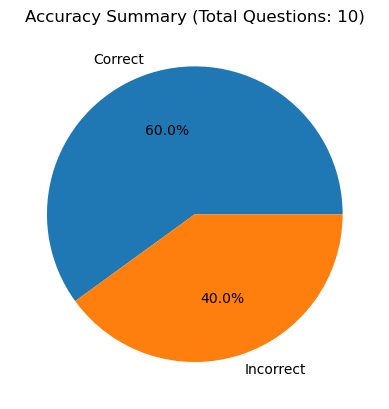

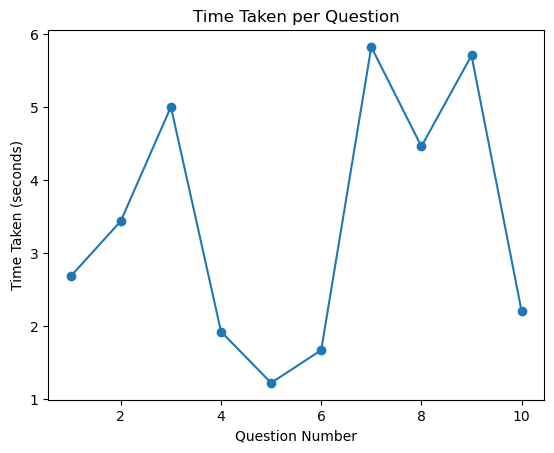

In [ ]:

#main working
total=10
level=1
history=[]
time1=[]

if __name__ == "__main__":

    for i in range(1,total+1):
        
        #generating question
        question,answer=classify_with_llm(
           level 
        )
        answer=int(answer)
        
        print(f"Question {i}:",question)
        start=time.time()
        ans=int(input())
        end=time.time()
    
        #calculating user response time
        d=end-start

        #maintaining history and time
        if ans==answer:
            history.append(1)
        else:
            history.append(0)
        time1.append(d)
        
        #modifying level
        level=Adaptive_logic.difficulty_modifier(history[i-1],d,i)
        
    #generating summary
    Tracker.track(history,time1)
    print("Average time taken per question:",sum(time1)/len(time1))

